In [ ]:
# Install geopandas first, if not in your system.

In [2]:
#!pip install geopandas
#!pip install pycircular

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd
import pycircular

In [2]:
### Identify and remove duplicates 

import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.read_csv(r'E:/PROFESSION/NG/Research/PN_Raja/Muenster_hai.csv')
duplicates = df.duplicated()
print(df[duplicates])

         AGG_DAY_PERIOD           GEOGRAPHY  ACTIVITY_INDEX_TOTAL      XLON  \
121077       2020-12-27  120203012233211000              0.248520  7.328568   
471474       2020-12-15  120203010231313213              0.220168  7.376633   
7631165      2020-06-24  120203001322223220              0.179793  6.691360   
11132994     2020-04-01  120203012013033212              0.174761  7.331314   
12631634     2020-02-20  120203030032001322              0.380213  7.224197   

               XLAT  
121077    51.644868  
471474    52.122107  
7631165   52.053757  
11132994  51.973461  
12631634  51.447588  


In [3]:
df.head()

,AGG_DAY_PERIOD,GEOGRAPHY,ACTIVITY_INDEX_TOTAL,XLON,XLAT
0,2020-12-31,120203021133103213,0.081590,7.003098,51.442453
1,2020-12-31,120203021130221130,0.016807,6.875381,51.465558
2,2020-12-31,120203021130303123,0.127186,6.917953,51.471547
3,2020-12-31,120203012210111031,0.024016,7.288742,51.833656
4,2020-12-31,120203012112121023,0.033855,7.615585,51.981920


In [4]:
### Identify missing data
import pandas as pd

# Assuming 'df' is your DataFrame
print(df.isnull().sum())

#a. Delete null
# To drop rows with any missing values
#df_cleaned = df.dropna()

# To drop columns with any missing values
#df_cleaned = df.dropna(axis=1)

#b. Impute null
# Impute missing values with mean
#df_cleaned = df.fillna(df.mean())

# Impute missing values with forward-fill
#df_cleaned = df.fillna(method='ffill')

# Impute missing values with backward-fill
#df_cleaned = df.fillna(method='bfill')

#######################  OR  ####################


# Removing invalid rows
#df_cleaned = df.drop(invalid_rows.index)

# Imputing missing or invalid values in numeric columns
#df['numeric_column'].fillna(df['numeric_column'].mean(), inplace=True)

# Imputing missing or invalid values in categorical columns
#df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)


AGG_DAY_PERIOD          0
GEOGRAPHY               0
ACTIVITY_INDEX_TOTAL    0
XLON                    0
XLAT                    0
dtype: int64


In [5]:
### Explore outliers
#a. Remove them
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the column containing outliers
Q1 = df['ACTIVITY_INDEX_TOTAL'].quantile(0.25)
Q3 = df['ACTIVITY_INDEX_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
print(f"{Q1}, {Q3}, {IQR}")

# Filter outliers using the interquartile range (IQR) method
#df_cleaned = df[(df['ACTIVITY_INDEX_TOTAL'] >= Q1 - 1.5 * IQR) & (df['ACTIVITY_INDEX_TOTAL'] <= Q3 + 1.5 * IQR)]
#df_cleaned.head()

#b. Transforming them using log transformation, square root transformation, or Box-Cox transformation
# Log transformation
#df['transformed_log'] = np.log(df['ACTIVITY_INDEX_TOTAL'])

# Square root transformation
#df['transformed_sqrt'] = np.sqrt(df['ACTIVITY_INDEX_TOTAL'])

# Box-Cox transformation (requires data to be positive, so you might need to add a constant if necessary)
from scipy.stats import boxcox
#df['transformed_boxcox'], _ = boxcox(df['ACTIVITY_INDEX_TOTAL'])



0.055415, 0.150588, 0.09517300000000001


In [6]:
### Correct irrelevant data: Columns with constant values, Columns with mostly missing data, 
### and Data points or rows with missing values in critical fields.
# Removing rows with missing values in critical fields
df_cleaned = df.dropna(subset=['ACTIVITY_INDEX_TOTAL'])

# Removing columns with constant values or high missing value percentage
#df_cleaned = df.drop(columns=['column_with_constant_values', 'column_with_high_missing'])

In [7]:
### Detect invalid or inconsistent data

# Step 1: Identify Invalid or Inconsistent Data Start by thoroughly examining your dataset and identifying potential issues, 
# such as: Data outside valid ranges, Contradictory information, Format discrepancies, Data type inconsistencies.

# Step 2: Data Validation Perform data validation checks to verify the integrity of the data. Common validation checks include:
# Ensure that numeric values fall within valid ranges, Validate that data entries match the expected format, Cross-check related 
# fields to ensure their consistency.

# Range checks for numeric columns
#invalid_numeric_data = df[(df['ACTIVITY_INDEX_TOTAL'] < lower_bound) | (df['ACTIVITY_INDEX_TOTAL'] > upper_bound)]

# Format checks for date column (assuming 'date_column' is in 'datetime' format)
#invalid_date_format_data = df[~df['AGG_DAY_PERIOD'].dt.strftime(date_format).isin(valid_date_formats)]

# Consistency check for related fields
#inconsistent_data = df[df['related_field1'] != df['related_field2']]

### Data Exploration ###

#### 1. Calculate summary statistics such as mean, median, and mode to understand the central tendencies and distributions of the data. ####

In [8]:
### Mean
mean_value = df['ACTIVITY_INDEX_TOTAL'].mean()

### Median
median_value = df['ACTIVITY_INDEX_TOTAL'].median()

### Mode
mode_value = stats.mode(df['ACTIVITY_INDEX_TOTAL'], keepdims = True)[0][0]

print(f'Mean is : {mean_value}, Median is : {median_value}, and Mode is : {mode_value}')

Mean is : 0.11268904366348204, Median is : 0.10384, and Mode is : 0.065815


#### 2. Visualize the data using graphs, charts, and histograms. This will help to identify any patterns or anomalies in the data. ####


Text(0.5, 1.0, 'Scatter Plot of Geographical Distribution of Human Activity Index')

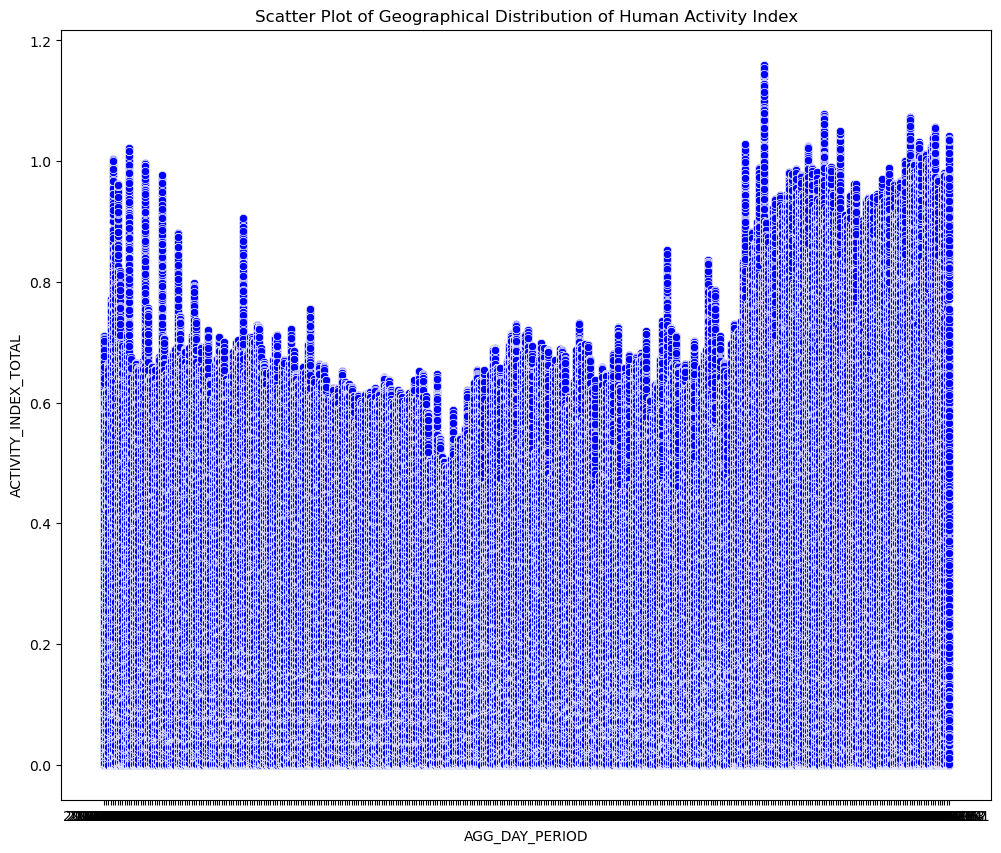

In [18]:
### Scatter plot: Ideally this should be AGG_DAY_PERIOD Vs ACTIVITY_INDEX_TOTAL
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='AGG_DAY_PERIOD', y='ACTIVITY_INDEX_TOTAL', color = 'b')
plt.xlabel('AGG_DAY_PERIOD')
plt.ylabel('ACTIVITY_INDEX_TOTAL')
plt.title('Scatter Plot of Geographical Distribution of Human Activity Index')
plt.show()

In [ ]:
### Hexbin Plot of Number of Activities recorded based on geographical location

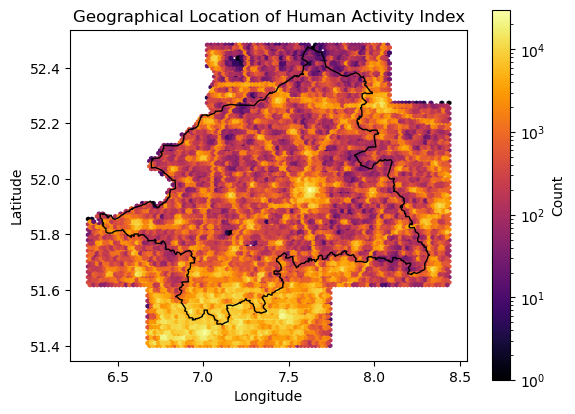

In [59]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Read the muenster shapefile
muenster = gpd.read_file(r"E:\PROFESSION\NG\Research\PN_Raja\GeoJSON\Muenster.geojson")
lon = np.array(df['XLON'])
lat = np.array(df['XLAT'])

# Creating the hexbin plot
plt.hexbin(lon, lat, gridsize=100, bins='log', cmap='inferno')

# Overlaying the muenster shapefile on the plot
muenster.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth = 1)

# Adding a color bar on the right
cb = plt.colorbar(label='Count')

# Setting labels and title
plt.xlabel('Longitude in DD')
plt.ylabel('Latitude in DD')
plt.title('Geographical Location of Human Activity Index ')

# Show the plot
plt.show()


### SCATTERPLOT ###

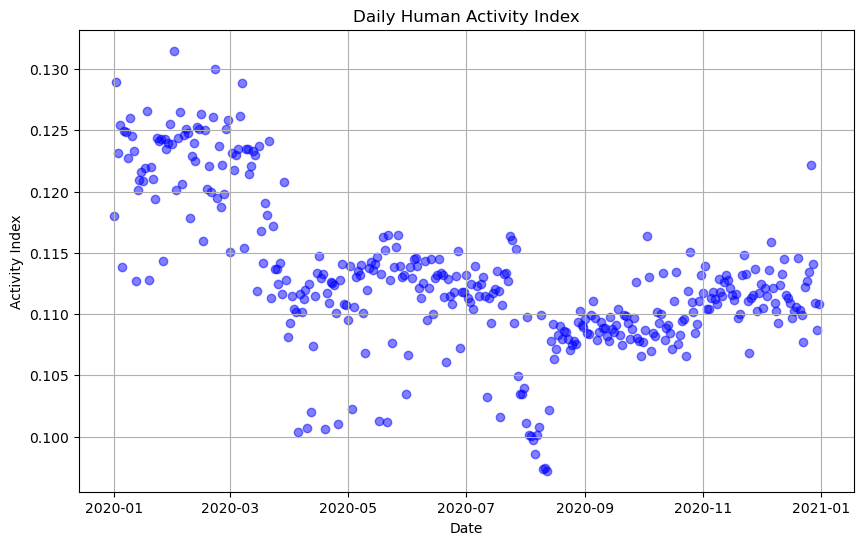

In [19]:


#Scatterplot based on daily aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by day
daily_data = df.groupby(df['date'].dt.date)['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
daily_data.index = pd.to_datetime(daily_data.index)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(daily_data.index, daily_data.values, color='blue', alpha=0.5)
plt.title('Daily Human Activity Index')
plt.xlabel('Date')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


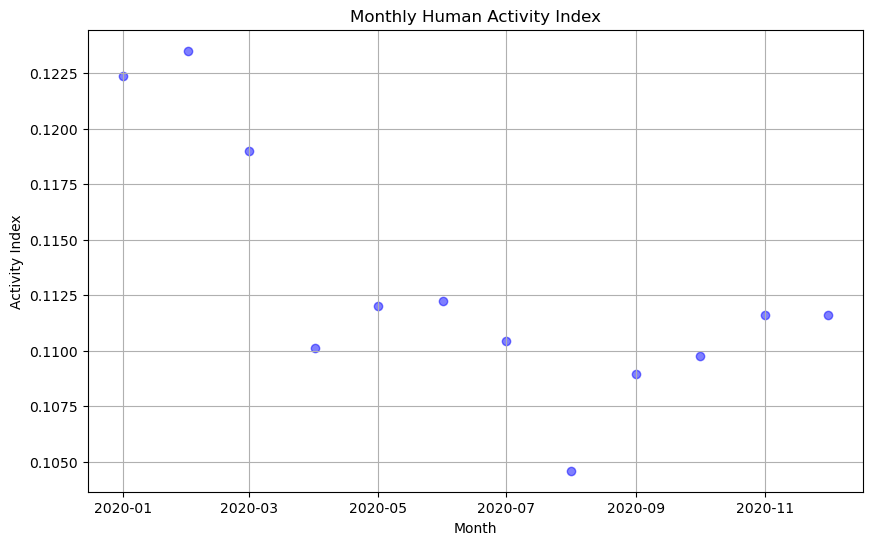

In [24]:
#Scatterplot based on monthly aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by month
monthly_data = df.groupby(df['date'].dt.to_period('M'))['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
monthly_data.index = pd.to_datetime(monthly_data.index.to_timestamp())

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data.index, monthly_data.values, color='blue', alpha=0.5)
plt.title('Monthly Human Activity Index')
plt.xlabel('Month')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


### LINE CHART

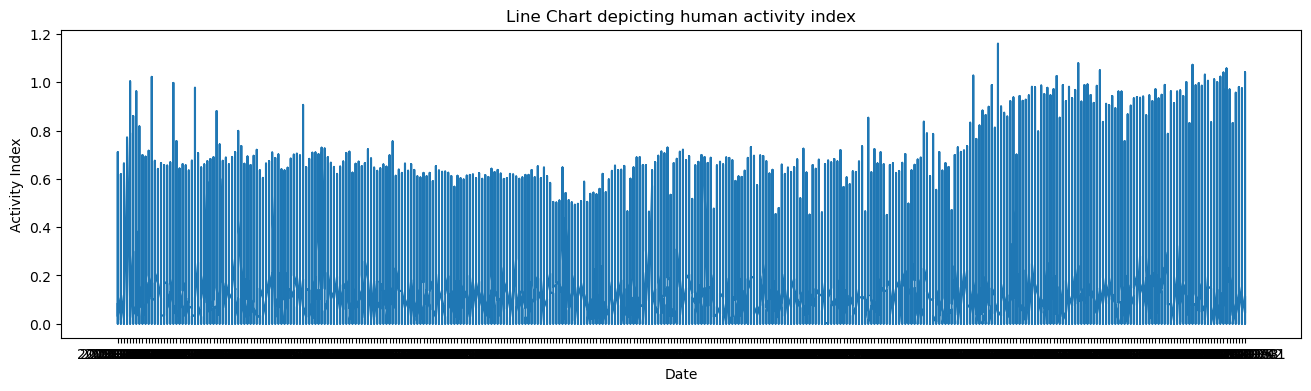

In [25]:
### Line Chart
plt.figure(figsize=(16, 4))
plt.plot(df['AGG_DAY_PERIOD'], df['ACTIVITY_INDEX_TOTAL'])
plt.xlabel('Date')
plt.ylabel('Activity Index')
plt.title('Line Chart depicting human activity index')
plt.show()

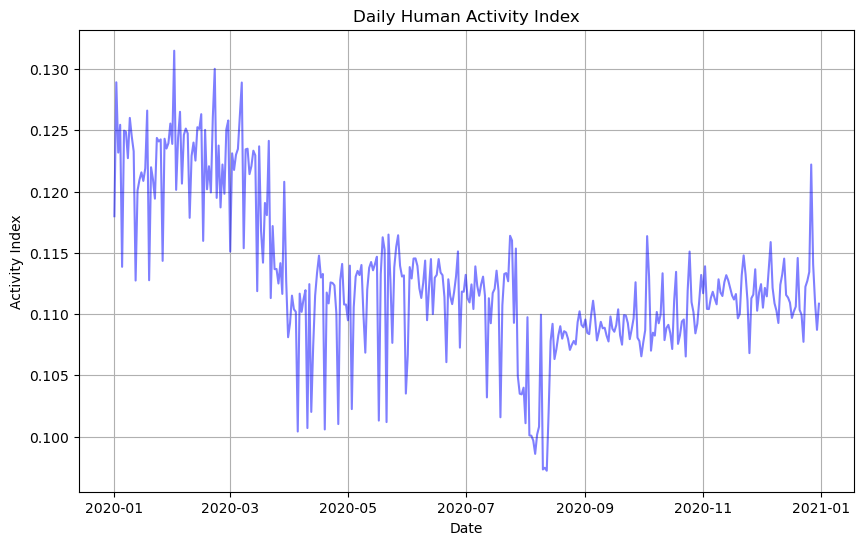

In [29]:


# Line Chart based on daily aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by day
daily_data = df.groupby(df['date'].dt.date)['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
daily_data.index = pd.to_datetime(daily_data.index)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data.values, color='blue', alpha=0.5)
plt.title('Daily Human Activity Index')
plt.xlabel('Date')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


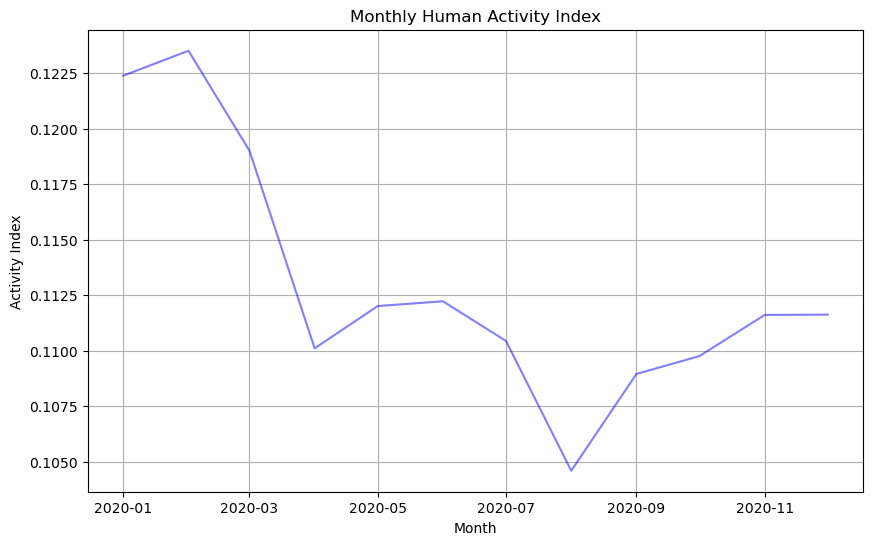

In [30]:
# Line Chart based on monthly aggregate
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Aggregate data by month
monthly_data = df.groupby(df['date'].dt.to_period('M'))['ACTIVITY_INDEX_TOTAL'].mean()

# Convert index to datetime
monthly_data.index = pd.to_datetime(monthly_data.index.to_timestamp())

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data.values, color='blue', alpha=0.5)
plt.title('Monthly Human Activity Index')
plt.xlabel('Month')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


### HISTOGRAM

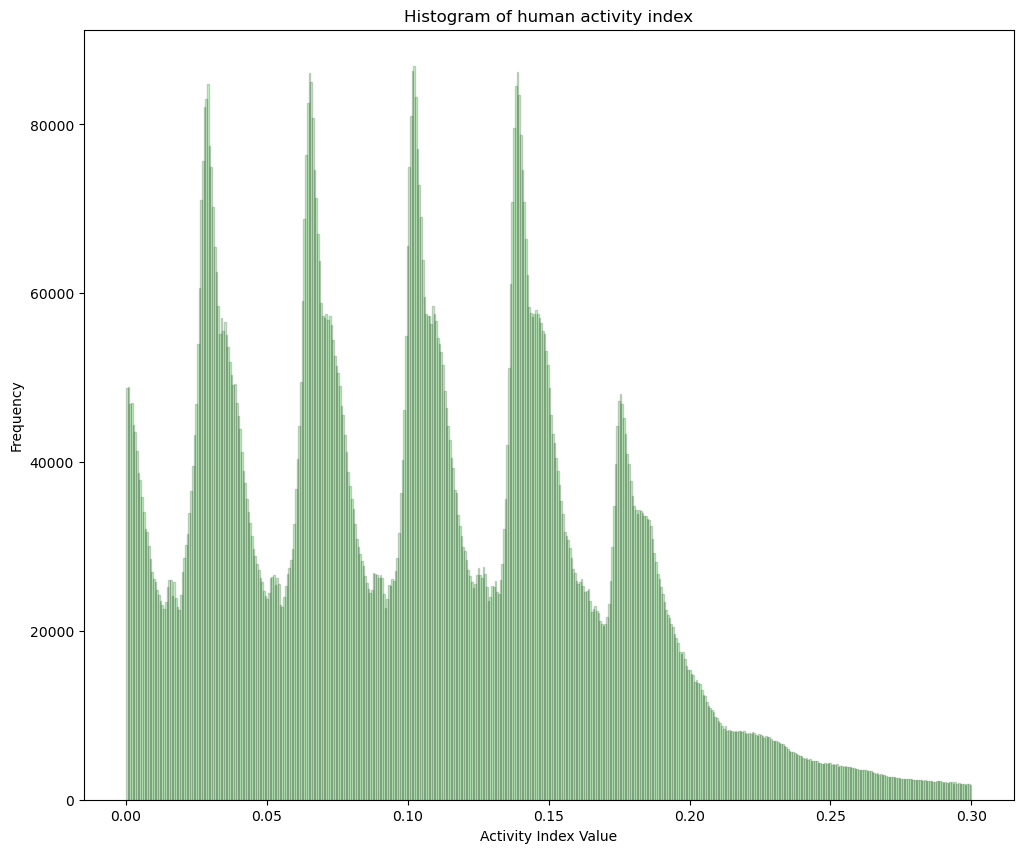

In [51]:
### Histogram
colors = ['lime']
plt.figure(figsize=(12, 10))
plt.hist(df['ACTIVITY_INDEX_TOTAL'], density = 0, bins=500, edgecolor='black', color = colors,
         label = colors, range = [0.0, 0.3], align ='mid', alpha = 0.2)
plt.xlabel('Activity Index Value')
plt.ylabel('Frequency')
plt.title('Histogram of human activity index')
plt.show()

### BOX PLOT

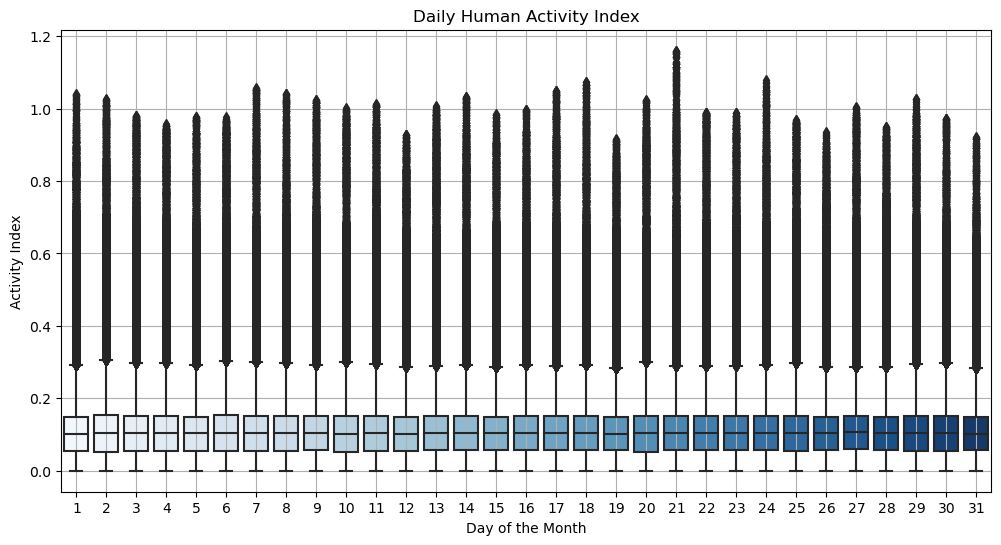

In [57]:
### Daily
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Set figure size
plt.figure(figsize=(12, 6))

# Create daily boxplot
sns.boxplot(x=df['date'].dt.day, y=df['ACTIVITY_INDEX_TOTAL'], palette='Blues')
plt.title('Daily Human Activity Index')
plt.xlabel('Day of the Month')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


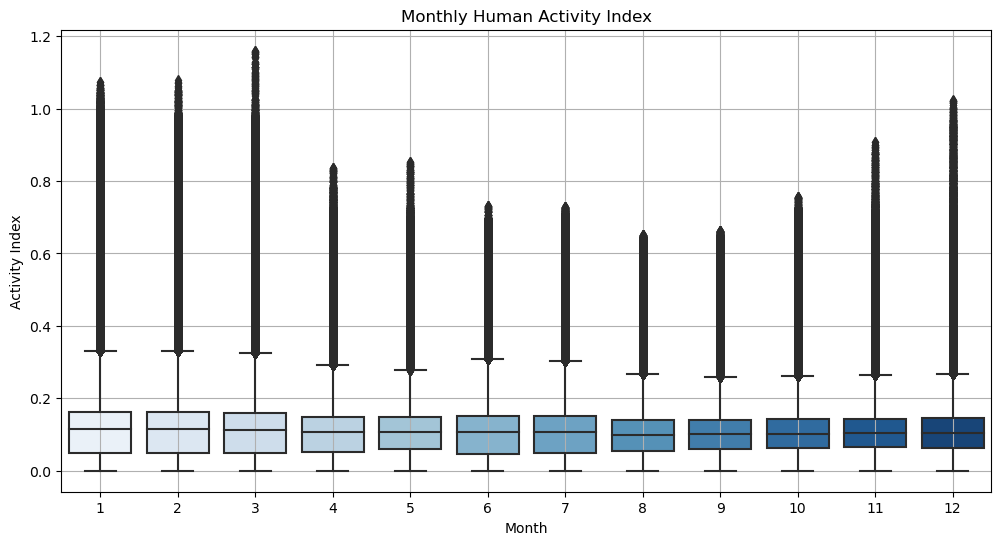

In [58]:
### Monthly

# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Set figure size
plt.figure(figsize=(12, 6))

# Create monthly boxplot
sns.boxplot(x=df['date'].dt.month, y=df['ACTIVITY_INDEX_TOTAL'], palette='Blues')
plt.title('Monthly Human Activity Index')
plt.xlabel('Month')
plt.ylabel('Activity Index')
plt.grid(True)
plt.show()


#### 3. Examine the correlations between variables using correlation matrices or scatter plots. ####

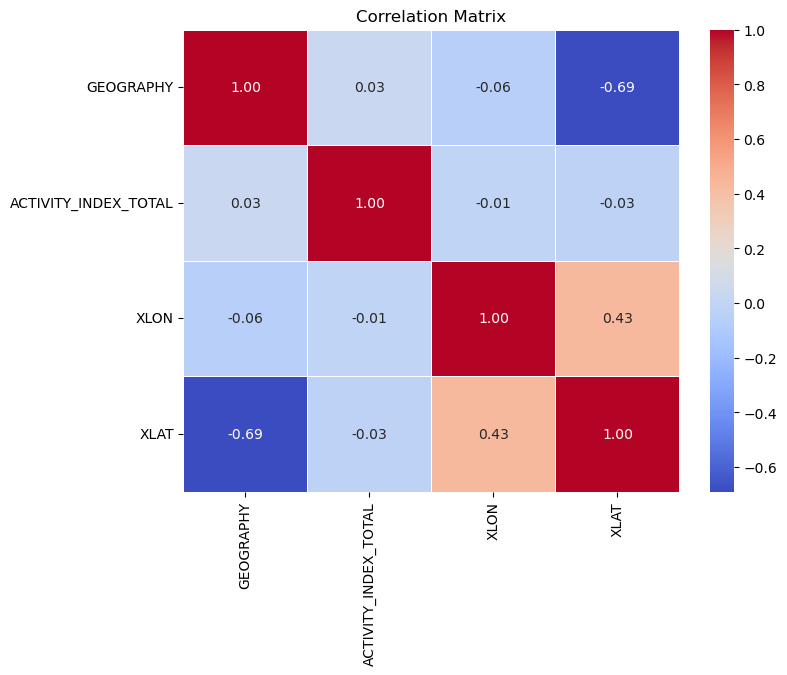

In [10]:
### Correlation Matrix
correlation_matrix = df.corr(numeric_only = True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Pycircular

##### For More: https://towardsdatascience.com/introducing-pycircular-a-python-library-for-circular-data-analysis-bfd696a6a42b

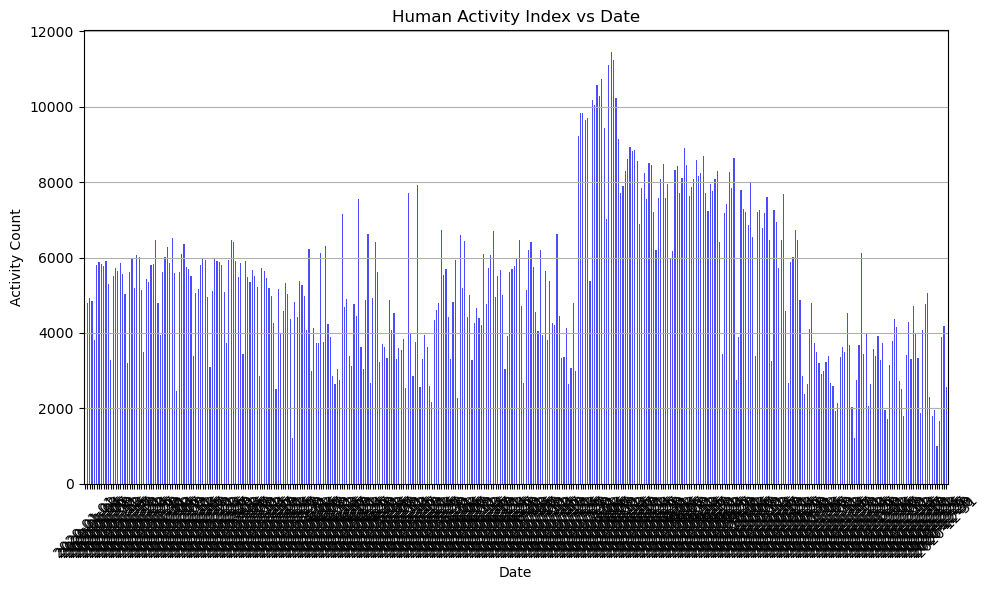

In [27]:
import pandas as pd
import pycircular
import matplotlib.pyplot as plt

# Load data
#df = pycircular.datasets.load_transactions()['data']

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['AGG_DAY_PERIOD'])

# Filter data for user 1
dates = df.loc[df['ACTIVITY_INDEX_TOTAL'] <= 0.03, 'date']

# Plotting
plt.figure(figsize=(10, 6))
dates.groupby(dates.dt.date).count().plot(kind="bar", color='blue', alpha=0.7)
plt.title('Human Activity Index vs Date')
plt.xlabel('Date')
plt.ylabel('Activity Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Circular Histogram Plot

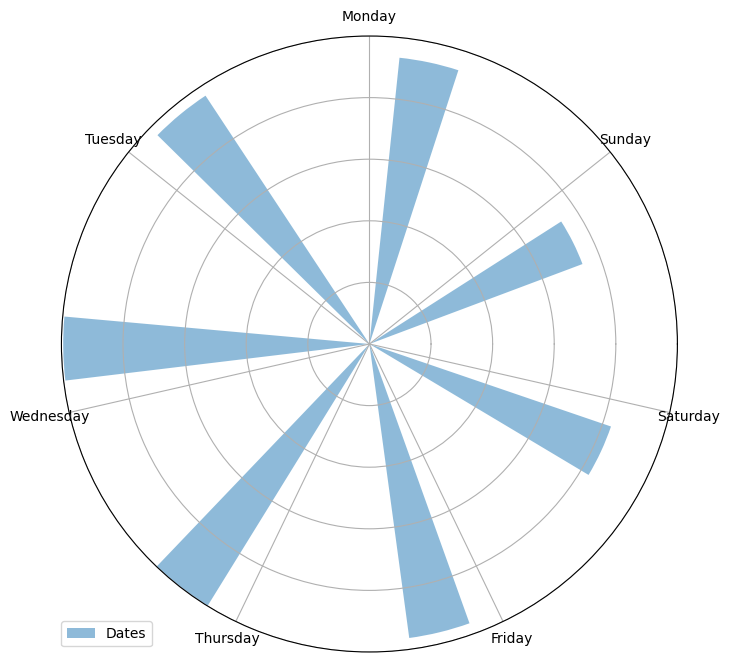

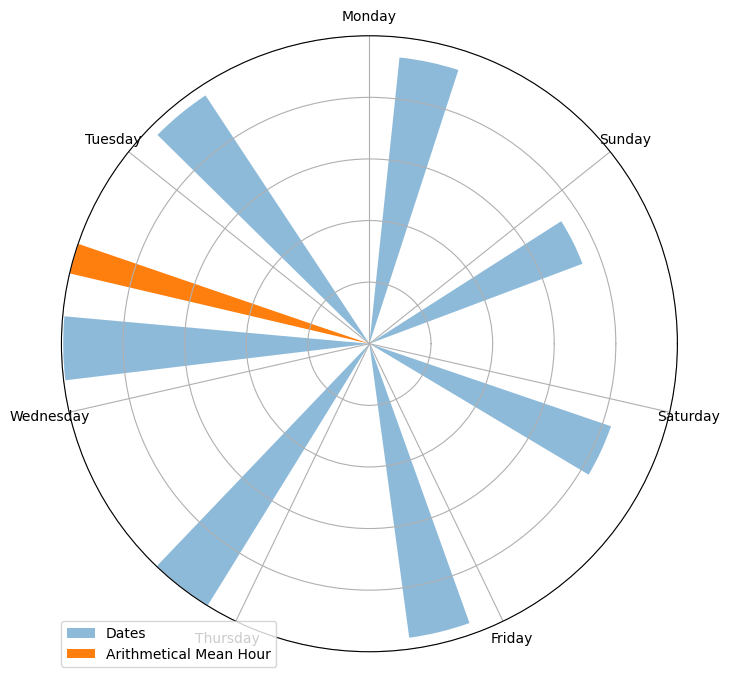

In [38]:
time_segment = 'dayweek'  # 'hour', 'dayweek', 'daymonth
freq_arr, times = pycircular.utils.freq_time(dates , time_segment=time_segment)
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment=time_segment)
ax1.legend(bbox_to_anchor=(0.0, 0.05), loc="upper left", borderaxespad=0)

plt.show()

dates_mean = times.values.mean()
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment=time_segment)
ax1.bar([dates_mean], [1], width=0.1, label='Arithmetical Mean Hour')
ax1.legend(bbox_to_anchor=(0.0, 0.05), loc="upper left", borderaxespad=0)

plt.show()

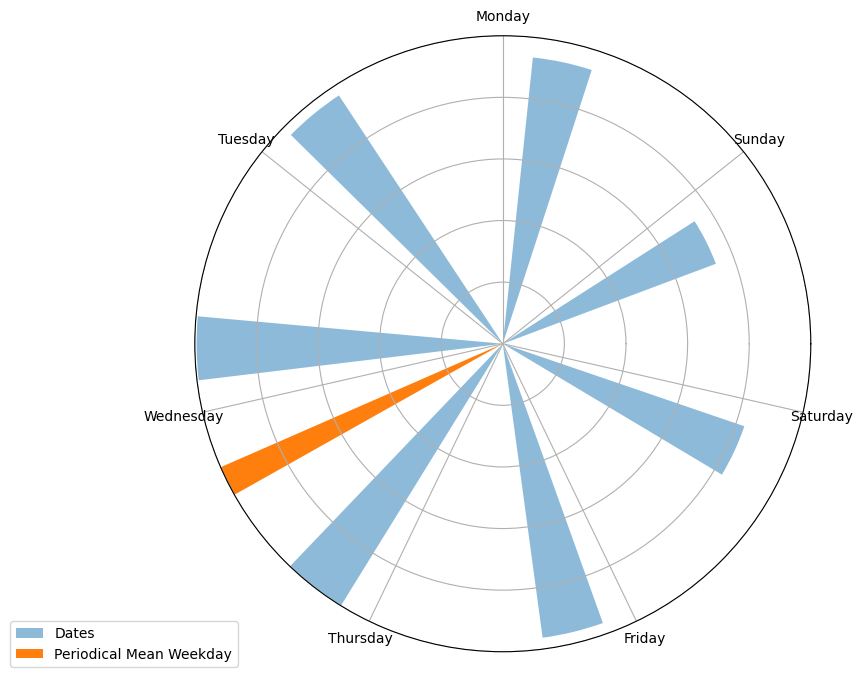

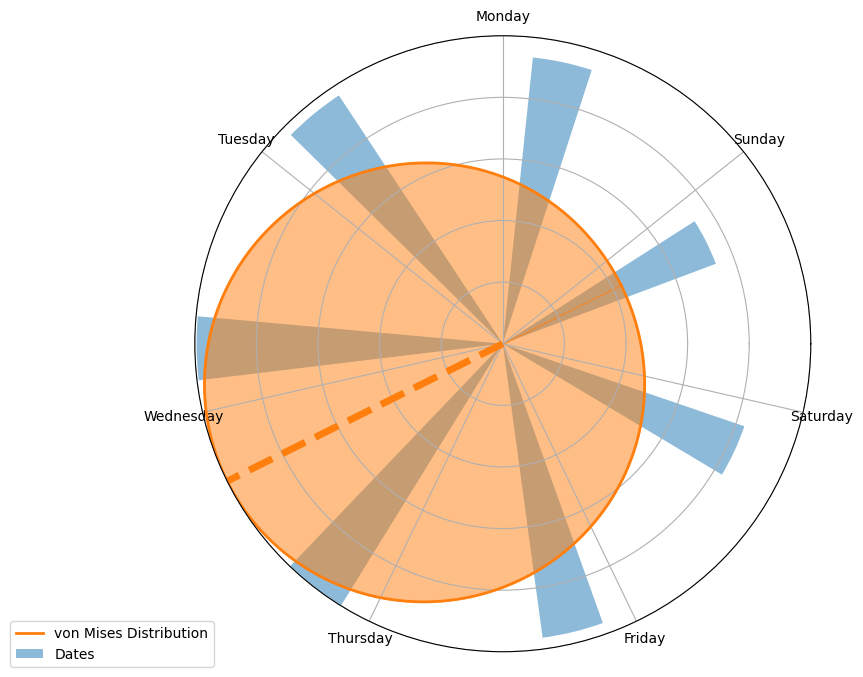

In [40]:
### do not use arithmatic mean to average time. 
### use the time of the transaction as a periodic variable, 
### in particular using the von Mises distribution

radians = pycircular.utils._date2rad(dates, time_segment='dayweek')
mean, std = pycircular.stats.periodic_mean_std(radians)

fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment=time_segment)
ax1.bar([mean], [1], width=0.1, label='Periodical Mean Weekday')
ax1.legend(bbox_to_anchor=(-0.3, 0.05), loc="upper left", borderaxespad=0)

plt.show()

# Calculate the von Mises distribution
x, p = pycircular.stats.von_mises_distribution(mean, std)

fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment='dayweek')

ax1 = pycircular.plots.clock_vonmises_distribution(ax1, mean, x, p)
plt.show()

In [ ]:
### Use of kernel density estimation (KDE).

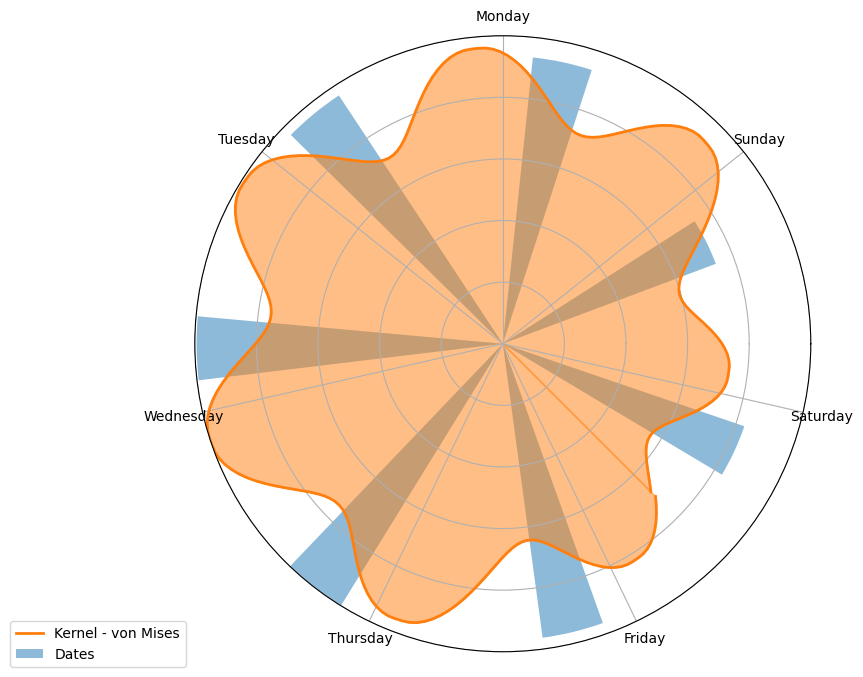

In [42]:
y = pycircular.circular.kernel(radians.values)

fig, ax1 = pycircular.plots.plot_kernel(freq_arr[:, 0], freq_arr[:, 1], y,time_segment=time_segment)

### Predict using KDE

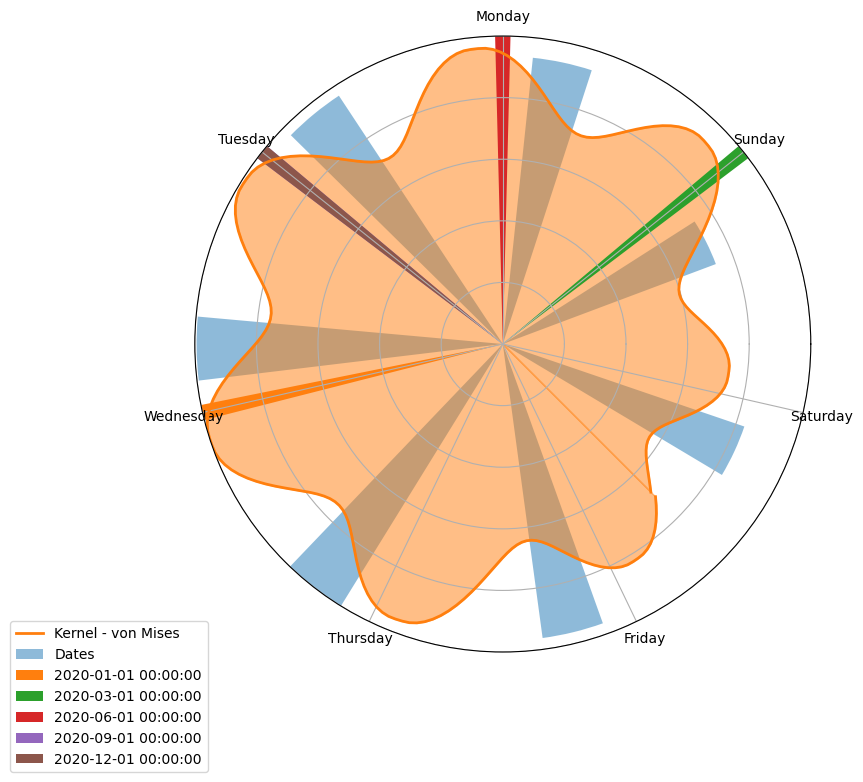

In [44]:
y_test = pd.DataFrame(pd.to_datetime([
    '2020-01-01',
    '2020-03-01',
    '2020-06-01',
    '2020-09-01',
    '2020-12-01',
    ]), columns=['dates'])

radians = pycircular.utils._date2rad(y_test['dates'], time_segment='dayweek')
y_test['prob'] = pycircular.circular.predict_proba(radians, y)

fig, ax1 = pycircular.plots.plot_kernel(freq_arr[:, 0], freq_arr[:, 1], y,time_segment=time_segment)

for i in range(y_test.shape[0]):
    ax1.bar([radians[i]], [1], width=0.05, label=y_test.loc[i, 'dates'])
    
ax1.legend(bbox_to_anchor=(-0.3, 0.05), loc="upper left", borderaxespad=0)

In [46]:
print(y_test)

       dates      prob
0 2020-01-01  0.990709
1 2020-03-01  0.739281
2 2020-06-01  0.928627
3 2020-09-01  0.962157
4 2020-12-01  0.962157


### Convert csv to shp

In [11]:
data_gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['XLON'], df['XLAT']))
type(data_gdf)


geopandas.geodataframe.GeoDataFrame

In [ ]:
#data_gdf.plot()


In [17]:
### Create a shapefile
### Define Projection
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'
data_gdf.to_file(filename='Muen_hai.shp', driver = 'ESRI Shapefile', crs_wkt='ESRI_WKT')


In [18]:
from shapely.geometry import Point

# Create a geometry column with Point objects representing the lat/lon coordinates
geometry = [Point(lon, lat) for lon, lat in zip(df['XLON'], df['XLAT'])]

# Create a GeoDataFrame from the DataFrame and the geometry column
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # Use EPSG:4326 for WGS84 coordinates

# Save the GeoDataFrame to a shapefile
gdf.to_file("Muen.shp")

C:\Users\janak\AppData\Local\Temp\ipykernel_13712\678620787.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("Muen.shp")


### Spatial Autocorrelation

In [19]:
import numpy as np
import geopandas as gpd
import libpysal.weights as lpw
from esda.moran import Moran
from esda.getisord import G_Local

In [ ]:
# Load your data
# Replace 'data.shp' with the path to your shapefile or geodataframe
gdf = gpd.read_file(r"C:\Users\janak\Muenster_Moves\Muen.shp")

In [ ]:
# Assuming 'ACTIVITY_INDEX_TOTAL' is the column containing the human activity index
activity_index = gdf['ACTIVITY_INDEX_TOTAL'].values

# Assuming 'x' and 'y' are the columns containing x and y coordinates
x_coords = gdf.geometry.XLON
y_coords = gdf.geometry.XLAT

# Create spatial weights matrix (Queen contiguity)
w = lpw.Queen.from_dataframe(gdf)

# Moran's I
moran = Moran(activity_index, w)
print("Moran's I:", moran.I)

# Getis-Ord Gi* (Local Spatial Autocorrelation)
gi = G_Local(activity_index, w)
# Significant local autocorrelation (z-scores)
z_scores = gi.z_sim
# P-values
p_values = gi.p_sim
# Local Gi* values
local_gi = gi.Gs
# Significance: 1 if significant, 0 if not
significant = (p_values < 0.05).astype(int)

# Print first 10 records of z-scores, p-values, local Gi* values, and significance
print("Z-Scores:", z_scores[:10])
print("P-Values:", p_values[:10])
print("Local Gi* Values:", local_gi[:10])
print("Significance:", significant[:10])


In [ ]:
#!pip install -U kaleido

In [ ]:
import plotly.express as px

fig = px.density_mapbox(df, lat='XLAT', lon='XLON', z='ACTIVITY_INDEX_TOTAL',
                        radius=15,  # Adjust the radius to control the density
                        center=dict(lat=49, lon=12),
                        zoom=8,
                        mapbox_style='open-street-map',
                        color_continuous_scale='rainbow',
                        opacity=0.7)  # Adjust the opacity to control the density
#fig.show()
fig.write_image("muen hai.png") 


#### 4. Use hypothesis tests to form initial insights and generate new hypotheses. ###

In [ ]:
shp.head()

In [ ]:

# Load the shapefile as a GeoDataFrame
shp = gpd.read_file(r"E:\PROFESSION\NG\Research\PN_Raja\DEU_adm\DEU_adm1.shp")

# Load the CSV file as a DataFrame
#csv_df = pd.read_csv('path_to_csv.csv')

# Convert the CSV DataFrame to a GeoDataFrame with point geometry
csv_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.XLON, df.XLAT), crs='EPSG:4326')

# Perform the spatial join
joined_gdf = gpd.sjoin(csv_gdf, shp, how='left', predicate='intersects')

# Create Choropleth map based on provinces
#fig = px.choropleth_mapbox(
#    data_frame = joined_gdf.set_index("ID_1"),    # Using the id as index of the data
 #   geojson = joined_gdf.geometry,                # The geometry
  #  locations = joined_gdf.index,                 # The index of the data
   # color = 'NAME_1',
    #mapbox_style = 'open-street-map',
    #center = dict(lat = 49, lon = 12),
    #zoom = 4)

#fig.show() 

In [ ]:
joined_gdf.head()

In [ ]:
joined_gdf.head(5)

In [ ]:
import geopandas
import plotly.express as px

shp = geopandas.read_file(r"E:\PROFESSION\NG\Research\PN_Raja\DEU_adm\DEU_adm1.shp")
shp = shp.to_crs("WGS84")

fig = px.choropleth_mapbox(
    data_frame = shp.set_index("ID_1"), # Using the id as index of the data
    geojson = shp.geometry,                # The geometry
    locations = shp.index,                 # The index of the data
    color = 'NAME_1',
    mapbox_style = 'open-street-map',
    center = dict(lat = 49, lon = 12),
    zoom = 4)

fig.show() 

In [ ]:
joined_gdf.head()

In [ ]:
spatial autocorrelation

In [ ]:
import numpy as np
import scipy.spatial as spatial
import geopandas as gpd

In [ ]:
#!pip install pysal#
#!pip install libpysal

In [ ]:
import libpysal as ps
import esda

# create a spatial weights object
w = ps.weights.Queen.from_dataframe(joined_gdf, use_index = True)

# display the weights object
#print(w)

# compute Moran's I
mi = esda.moran.Moran(joined_gdf['ACTIVITY_INDEX_TOTAL'], w)

# display the Moran's I statistic
print(mi.I)


In [ ]:
import pysal

# Load the dataset from a CSV file
#data = pd.read_csv('path/to/your/csvfile.csv')

# Create a spatial weights object
w = pysal.weights.Queen.from_dataframe(df)

# Compute the Moran's I index
i = pysal.Moran(data['human_activity_index'], w)

# Print the Moran's I index
print(i.I)

In [ ]:
def calculate_spatial_autocorrelation(df):
    # Calculate the distance matrix between all points
    distances = spatial.distance.pdist(df.geometry.values.data)
    # Get the number of points
    n = len(df)
    # Create a matrix of weights based on the inverse distance between points
    weights = np.array([[1.0 / np.sqrt(distances[i, j])
                         for j in range(n)]
                        for i in range(n)])
    # Calculate the Moran's I statistic
    moran_i = spatial.stats.moran(df.value, weights)
    print(f'Moran\'s I = {moran_i:.4f}')
    # Calculate the p-value
    p_value = 1 - spatial.stats.t_test(df.value, weights)
    print(f'p-value = {p_value:.4f}')

In [ ]:
calculate_spatial_autocorrelation(df)